In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
%pip list

In [2]:
train = pd.read_csv('ais_train.csv', sep='|')
train['time'] = pd.to_datetime(train['time'])
train.tail()

,time,cog,sog,rot,heading,navstat,etaRaw,latitude,longitude,vesselId,portId
1522060,2024-05-07 23:59:07,359.1,13.4,0,1,0,05-08 05:00,52.19131,-5.82223,clh6aqawa0002gh0zypfa5dut,634c4de270937fc01c3a7417
1522061,2024-05-07 23:59:08,12.3,17.1,0,13,0,05-10 03:00,38.96142,-12.00502,61e9f3aeb937134a3c4bfe43,634c4de270937fc01c3a76a1
1522062,2024-05-07 23:59:08,269.8,14.9,-1,270,0,05-15 23:00,49.71372,-5.22042,61e9f43db937134a3c4c0169,634c4de270937fc01c3a787b
1522063,2024-05-07 23:59:08,8.0,18.7,0,6,0,05-08 12:45,38.27895,10.78280,61e9f469b937134a3c4c029b,61d3781293c6feb83e5eb73b
1522064,2024-05-07 23:59:08,336.0,14.3,5,337,0,05-07 23:00,38.98635,-75.13275,62080cff66fc0a8e43c6123a,61d38528b7b7526e1adf3e6f


In [3]:
# Sort the dataset by vesselId and time
train = train.sort_values(by=['vesselId', 'time'])

# Compute the time difference (in minutes) between consecutive records for each vessel
train['time_delta'] = train.groupby('vesselId')['time'].diff().dt.total_seconds() / 60

# Display the result to check
train[['vesselId', 'time', 'time_delta']].tail()

,vesselId,time,time_delta
1521244,clh6aqawa0007gh0z9h6zi9bo,2024-05-07 22:36:16,20.983333
1521409,clh6aqawa0007gh0z9h6zi9bo,2024-05-07 22:57:05,20.816667
1521625,clh6aqawa0007gh0z9h6zi9bo,2024-05-07 23:17:54,20.816667
1521821,clh6aqawa0007gh0z9h6zi9bo,2024-05-07 23:38:13,20.316667
1522014,clh6aqawa0007gh0z9h6zi9bo,2024-05-07 23:59:01,20.800000


In [4]:
# Check for missing data in the dataset
missing_data = train.isnull().sum()

# Display the number of missing values in each column
print(missing_data[missing_data > 0])


portId        1615
time_delta     688
dtype: int64


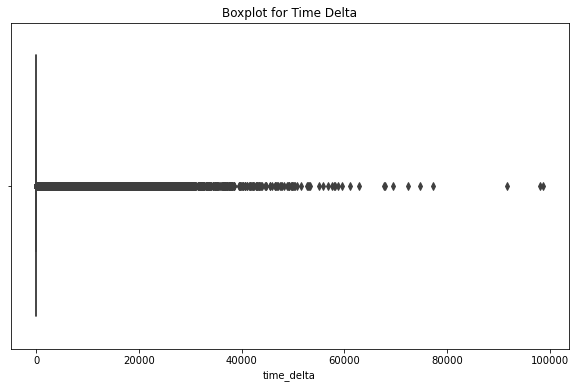

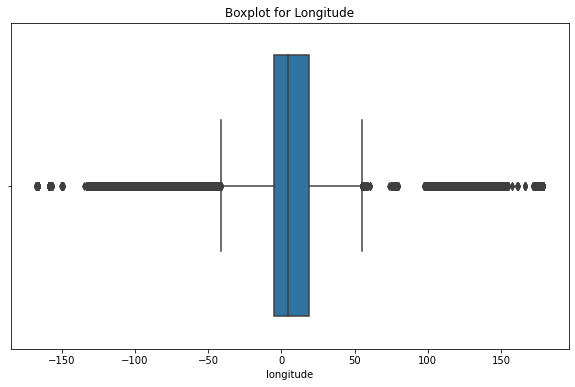

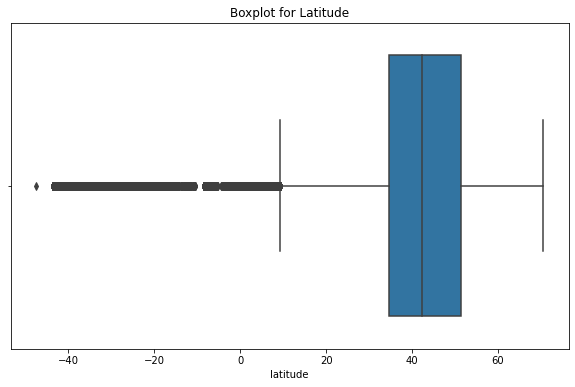

In [7]:

# Plot a boxplot for 'time_delta' to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=train['time_delta'])
plt.title('Boxplot for Time Delta')
plt.show()

# Plot a boxplot for longitude and latitude to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=train['longitude'])
plt.title('Boxplot for Longitude')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=train['latitude'])
plt.title('Boxplot for Latitude')
plt.show()

In [8]:
# Remove rows where 'time_delta' is missing (if needed)
train = train.dropna(subset=['time_delta'])

# Handle outliers in time_delta: Remove extreme outliers beyond a threshold (e.g., 99th percentile)
q99 = train['time_delta'].quantile(0.99)
train = train[train['time_delta'] < q99]

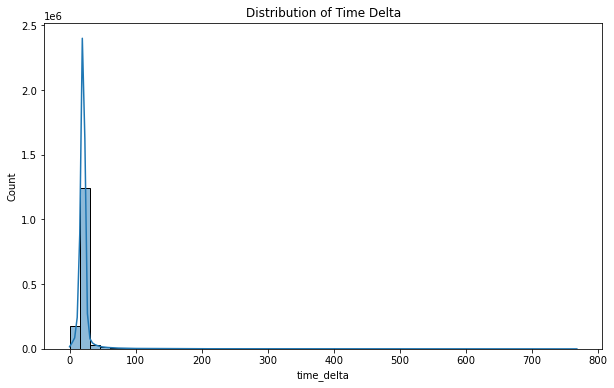

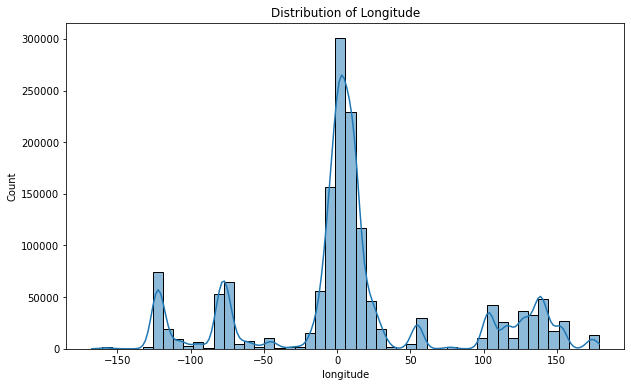

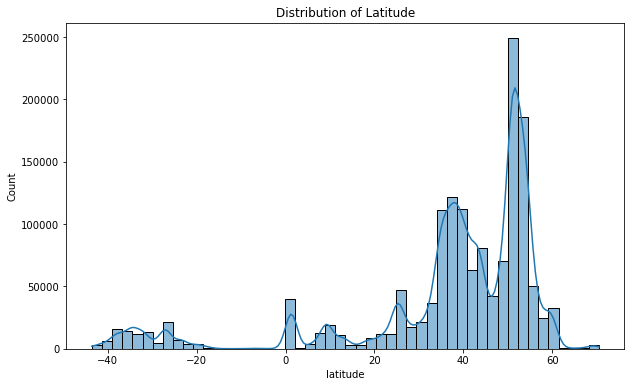

In [9]:
# Distribution plots for continuous features
plt.figure(figsize=(10, 6))
sns.histplot(train['time_delta'], bins=50, kde=True)
plt.title('Distribution of Time Delta')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(train['longitude'], bins=50, kde=True)
plt.title('Distribution of Longitude')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(train['latitude'], bins=50, kde=True)
plt.title('Distribution of Latitude')
plt.show()

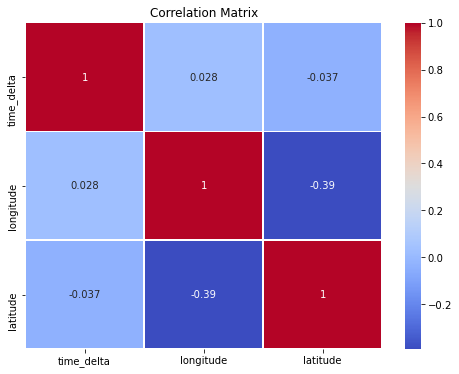

In [10]:
# Correlation matrix
correlation_matrix = train[['time_delta', 'longitude', 'latitude']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [14]:
#Missing port id solution
train['portId'] = train['portId'].fillna('unknown_port')

In [16]:
# Fill missing 'time_delta' values with the median value
train['time_delta'].fillna(train['time_delta'].median(), inplace=True)

In [18]:
# One-hot encode 'port_id' (or you can use label encoding as well)
train = pd.get_dummies(train, columns=['portId'], drop_first=True)


MemoryError: Unable to allocate 1.07 GiB for an array with shape (760, 1506163) and data type uint8